<a href="https://colab.research.google.com/github/kassy75035/1st-PyCrawlerMarathon/blob/master/Day70_Keras_Mnist_MLP_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
# 使用序列模型
model = Sequential()

In [10]:
# Input layer
model.add(Dense(units=256,
        input_dim=784,
        kernel_initializer='normal',
        activation='relu'))

In [11]:
# Hidden layer
model.add(Dense(units=256,
        kernel_initializer='normal',
        activation='relu'))

In [12]:
# Output layer
model.add(Dense(units=10, 
        kernel_initializer='normal', 
        activation='softmax'))

# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.1203 - val_accuracy: 0.9784
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.1257 - val_accuracy: 0.9766
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.1212 - val_accuracy: 0.9788
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.1372 - val_accuracy: 0.9781
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.1419 - val_accuracy: 0.9768
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.1256 - val_accuracy: 0.9796
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.1437 - val_accuracy:

# 以圖形顯示訓練過程

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [37]:
train_history.history

{'accuracy': [0.9947500228881836,
  0.9950208067893982,
  0.9950833320617676,
  0.9968958497047424,
  0.9950416684150696,
  0.9967708587646484,
  0.9957083463668823,
  0.9965416789054871,
  0.9971874952316284,
  0.9967708587646484],
 'loss': [0.015530006028711796,
  0.01594846136868,
  0.015115761198103428,
  0.008894846774637699,
  0.014925099909305573,
  0.010811910033226013,
  0.01387799996882677,
  0.011010277085006237,
  0.0092582106590271,
  0.010860690847039223],
 'val_accuracy': [0.9784166812896729,
  0.9765833616256714,
  0.9788333177566528,
  0.9780833125114441,
  0.9767500162124634,
  0.9795833230018616,
  0.9756666421890259,
  0.9780833125114441,
  0.9777500033378601,
  0.9785000085830688],
 'val_loss': [0.12033636122941971,
  0.1257454752922058,
  0.12120705097913742,
  0.13723993301391602,
  0.14186035096645355,
  0.12562091648578644,
  0.14374710619449615,
  0.1458989381790161,
  0.1695280820131302,
  0.14930284023284912]}

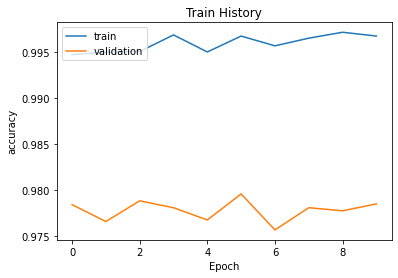

In [38]:
show_train_history(train_history,'accuracy','val_accuracy')

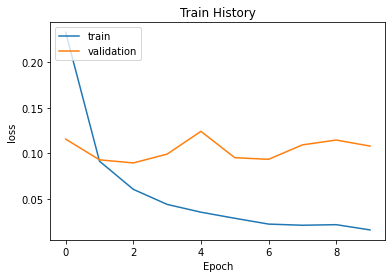

In [19]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0947 - accuracy: 0.9783

accuracy= 0.9782999753952026
